In [41]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
directory = 'Eelctronic_Helath_Records/'


file_paths = glob.glob(os.path.join(directory, '*.csv.gz'))

Loading csv gz files into df's

In [20]:
admissions_df   =   pd.read_csv(directory+'admissions.csv.gz')
diagnoses_df    =   pd.read_csv(directory+'diagnoses_icd.csv.gz')
labevents_df    =   pd.read_csv(directory+'labevents.csv.gz')
patients_df     =   pd.read_csv(directory+'patients.csv.gz')
prescriptions_df=   pd.read_csv(directory+'prescriptions.csv.gz')
procedures_icd_df=  pd.read_csv(directory+'procedures_icd.csv.gz')

In [ ]:
admissions_df.head(5)

In [ ]:
diagnoses_df.head(5)

In [ ]:
labevents_df.head(5)

In [ ]:
patients_df.head(5)

In [ ]:
prescriptions_df.head(5)


In [24]:
procedures_icd_df.head(5)

,subject_id,hadm_id,seq_num,chartdate,icd_code,icd_version
0,10011398,27505812,3,2146-12-15,3961,9
1,10011398,27505812,2,2146-12-15,3615,9
2,10011398,27505812,1,2146-12-15,3614,9
3,10014729,23300884,4,2125-03-23,3897,9
4,10014729,23300884,1,2125-03-20,3403,9


- all the csv.gz files are loaded into respectiev dataframes

Identifying the columns in each dataframes

In [25]:
df_list = ['admissions_df', 'diagnoses_df', 'labevents_df', 'patients_df', 'prescriptions_df', 'procedures_icd_df']

In [26]:
for df_name in df_list:
    df = globals()[df_name]
    print(f"Columns in {df_name}:")
    print(df.columns.tolist())
    print("-" * 50)

Columns in admissions_df:
['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admit_provider_id', 'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status', 'race', 'edregtime', 'edouttime', 'hospital_expire_flag']
--------------------------------------------------
Columns in diagnoses_df:
['subject_id', 'hadm_id', 'seq_num', 'icd_code', 'icd_version']
--------------------------------------------------
Columns in labevents_df:
['labevent_id', 'subject_id', 'hadm_id', 'specimen_id', 'itemid', 'order_provider_id', 'charttime', 'storetime', 'value', 'valuenum', 'valueuom', 'ref_range_lower', 'ref_range_upper', 'flag', 'priority', 'comments']
--------------------------------------------------
Columns in patients_df:
['subject_id', 'gender', 'anchor_age', 'anchor_year', 'anchor_year_group', 'dod']
--------------------------------------------------
Columns in prescriptions_df:
['subject_id', 'hadm_id', 'pharmacy_id', 'poe_id', 'poe_

Assumptions from columns

**Consistent Patient Identifiers:** The presence of subject_id and hadm_id across multiple DataFrames (e.g., admissions_df, diagnoses_df, labevents_df) allows for seamless integration of patient data, enabling the LLM to produce detailed and individualized health reports.

**Rich Temporal Data:** Columns such as admittime, dischtime, chartdate, and starttime provide a clear timeline of patient care, which can enhance the LLM’s ability to generate chronological summaries in reports.

**Varied Data for Comprehensive Reports:** The combination of categorical data (e.g., gender, admission_type, drug) and numerical data (e.g., valuenum, anchor_age) supports the LLM in creating well-rounded reports with demographic, lab, and medication insights.

EDA Principles Function

In [47]:
def perform_eda(df, df_name="DataFrame"):
    """
    Perform Exploratory Data Analysis (EDA) on the given DataFrame and print insights.

    Parameters:
    - df: pandas DataFrame to analyze
    - df_name: str, optional name of the DataFrame for printing purposes
    """
    print(f"--- EDA for {df_name} ---")

    # Basic Information
    print("\nShape of the DataFrame:", df.shape)
    print("\nColumns:", df.columns.tolist())
    print("\nData Types:\n", df.dtypes)

    # Summary Statistics
    print("\nSummary Statistics:\n", df.describe())

    # Missing Values
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    print("\nMissing Values:\n", missing_values[missing_values > 0])
    print("\nMissing Values Percentage:\n", missing_percent[missing_percent > 0])

    # Unique Values for Categorical Columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        print(f"\nColumn: {col}")
        print("Number of unique values:", df[col].nunique())
        print("Most frequent value:", df[col].mode()[0])
        print("Frequency of most frequent value:", df[col].value_counts().iloc[0])

    # Data Distribution for Numerical Columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        print(f"\nColumn: {col}")
        print("Skewness:", df[col].skew())
        print("Kurtosis:", df[col].kurt())

    # Correlations
    if len(numerical_cols) > 1:
        print("\nCorrelation Matrix:\n", df[numerical_cols].corr())

    # Outliers Detection
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\nColumn: {col} - Number of outliers:", len(outliers))

    print("\n" + "="*50 + "\n")

In [29]:
for df_name in df_list:
    df = globals()[df_name]  # Get the DataFrame from the global namespace using its name
    perform_eda(df, df_name)

--- EDA for admissions_df ---

Shape of the DataFrame: (275, 16)

Columns: ['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admit_provider_id', 'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status', 'race', 'edregtime', 'edouttime', 'hospital_expire_flag']

Data Types:
 subject_id               int64
hadm_id                  int64
admittime               object
dischtime               object
deathtime               object
admission_type          object
admit_provider_id       object
admission_location      object
discharge_location      object
insurance               object
language                object
marital_status          object
race                    object
edregtime               object
edouttime               object
hospital_expire_flag     int64
dtype: object

Summary Statistics:
          subject_id       hadm_id  hospital_expire_flag
count  2.750000e+02  2.750000e+02            275.000000
mean   1.001890e+0

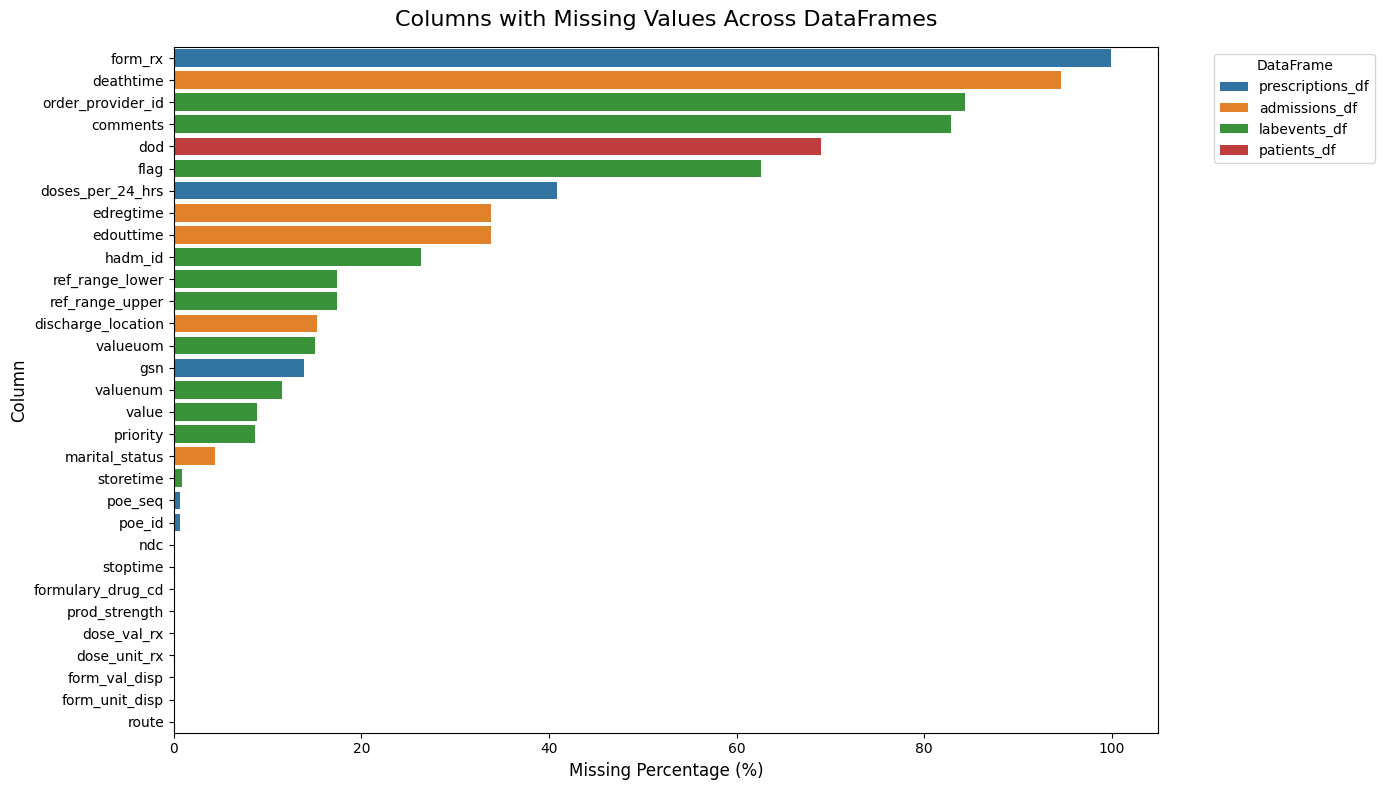

DataFrames with No Missing Values:
- diagnoses_df
- procedures_icd_df


In [46]:
# Missing Values Chart

dfs = {
    'admissions_df': admissions_df,
    'diagnoses_df': diagnoses_df,
    'labevents_df': labevents_df,
    'patients_df': patients_df,
    'prescriptions_df': prescriptions_df,
    'procedures_icd_df': procedures_icd_df
}

# Initialize an empty list to store missing value data
missing_data = []

# Iterate over each DataFrame to calculate missing value percentages
for df_name, df in dfs.items():
    missing_percent = (df.isnull().sum() / len(df)) * 100
    missing_percent = missing_percent[missing_percent > 0]  # Keep only columns with missing values
    for column, percent in missing_percent.items():
        missing_data.append({'DataFrame': df_name, 'Column': column, 'Missing Percentage': percent})

# Convert the list to a DataFrame
missing_df = pd.DataFrame(missing_data)

# Sort by missing percentage in descending order
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

# Create the bar chart
plt.figure(figsize=(14, 8))  # Set figure size for readability
sns.barplot(data=missing_df, x='Missing Percentage', y='Column', hue='DataFrame', dodge=False)
plt.title('Columns with Missing Values Across DataFrames', fontsize=16, pad=15)
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.ylabel('Column', fontsize=12)
plt.legend(title='DataFrame', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Find DataFrames with no missing values
no_missing_dfs = [name for name, df in dfs.items() if df.isnull().sum().sum() == 0]

# Display the legend
print("DataFrames with No Missing Values:")
for df_name in no_missing_dfs:
    print(f"- {df_name}")


Data Handling


# admissions_df

In [48]:
#Date Columns to Datetime
date_columns_admissions = ['admittime', 'dischtime', 'edregtime', 'edouttime', 'deathtime'] # Include 'deathtime'
for col in date_columns_admissions:
    if col in admissions_df.columns:
        admissions_df[col] = pd.to_datetime(admissions_df[col])

print(admissions_df.info()) # Check data types after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   subject_id            275 non-null    int64         
 1   hadm_id               275 non-null    int64         
 2   admittime             275 non-null    datetime64[ns]
 3   dischtime             275 non-null    datetime64[ns]
 4   deathtime             15 non-null     datetime64[ns]
 5   admission_type        275 non-null    object        
 6   admit_provider_id     275 non-null    object        
 7   admission_location    275 non-null    object        
 8   discharge_location    233 non-null    object        
 9   insurance             275 non-null    object        
 10  language              275 non-null    object        
 11  marital_status        263 non-null    object        
 12  race                  275 non-null    object        
 13  edregtime           

In [49]:
#Standardize admission_type

admissions_df['admission_type'] = admissions_df['admission_type'].str.lower().str.strip()
print("\n--- Value Counts for standardized admission_type ---")
print(admissions_df['admission_type'].value_counts(dropna=False)) # Check the standardized counts


--- Value Counts for standardized admission_type ---
admission_type
ew emer.                       104
observation admit               45
urgent                          38
eu observation                  30
surgical same day admission     18
direct emer.                    15
elective                        13
direct observation               7
ambulatory observation           5
Name: count, dtype: int64


In [50]:
print("\n--- Value Counts for discharge_location (before handling NaNs) ---")
print(admissions_df['discharge_location'].value_counts(dropna=False))


--- Value Counts for discharge_location (before handling NaNs) ---
discharge_location
HOME HEALTH CARE                76
HOME                            72
NaN                             42
SKILLED NURSING FACILITY        36
DIED                            15
REHAB                           13
CHRONIC/LONG TERM ACUTE CARE     9
HOSPICE                          5
AGAINST ADVICE                   4
PSYCH FACILITY                   2
ACUTE HOSPITAL                   1
Name: count, dtype: int64


In [51]:
admissions_df['discharge_location'].fillna('Unknown', inplace=True)
print("\n--- Value Counts for discharge_location (after filling NaN with 'Unknown') ---")
print(admissions_df['discharge_location'].value_counts(dropna=False)) # Verify NaNs are gone, 'Unknown' is added
print("\n--- Missing Values in admissions_df after handling discharge_location ---")
print(admissions_df.isnull().sum()) # Check overall missing values again


--- Value Counts for discharge_location (after filling NaN with 'Unknown') ---
discharge_location
HOME HEALTH CARE                76
HOME                            72
Unknown                         42
SKILLED NURSING FACILITY        36
DIED                            15
REHAB                           13
CHRONIC/LONG TERM ACUTE CARE     9
HOSPICE                          5
AGAINST ADVICE                   4
PSYCH FACILITY                   2
ACUTE HOSPITAL                   1
Name: count, dtype: int64

--- Missing Values in admissions_df after handling discharge_location ---
subject_id                0
hadm_id                   0
admittime                 0
dischtime                 0
deathtime               260
admission_type            0
admit_provider_id         0
admission_location        0
discharge_location        0
insurance                 0
language                  0
marital_status           12
race                      0
edregtime                93
edouttime              

/var/folders/pd/38jn5w_51k92jyv8dvk65ggm0000gn/T/ipykernel_43853/1711476529.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  admissions_df['discharge_location'].fillna('Unknown', inplace=True)


In [52]:
admissions_df['marital_status'].fillna('Unknown', inplace=True)
print("\n--- Value Counts for marital_status (after filling NaN with 'Unknown') ---")
print(admissions_df['marital_status'].value_counts(dropna=False)) # Verify NaNs are gone, 'Unknown' is added
print("\n--- Missing Values in admissions_df after handling marital_status ---")
print(admissions_df.isnull().sum()) # Check overall missing values again


--- Value Counts for marital_status (after filling NaN with 'Unknown') ---
marital_status
SINGLE      110
MARRIED      72
WIDOWED      54
DIVORCED     27
Unknown      12
Name: count, dtype: int64

--- Missing Values in admissions_df after handling marital_status ---
subject_id                0
hadm_id                   0
admittime                 0
dischtime                 0
deathtime               260
admission_type            0
admit_provider_id         0
admission_location        0
discharge_location        0
insurance                 0
language                  0
marital_status            0
race                      0
edregtime                93
edouttime                93
hospital_expire_flag      0
admittime_day             0
dtype: int64


/var/folders/pd/38jn5w_51k92jyv8dvk65ggm0000gn/T/ipykernel_43853/396588236.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  admissions_df['marital_status'].fillna('Unknown', inplace=True)


In [54]:
#Duplicates
print("\n--- Duplicate rows in admissions_df (before removing) ---")
print(admissions_df.duplicated().sum())

admissions_df.drop_duplicates(inplace=True) # Remove exact duplicate rows

print("\n--- Duplicate rows in admissions_df (after removing) ---")
print(admissions_df.duplicated().sum())
print("\n--- Shape of admissions_df after removing duplicates ---")
print(admissions_df.shape) # Check if shape changed


--- Duplicate rows in admissions_df (before removing) ---
0

--- Duplicate rows in admissions_df (after removing) ---
0

--- Shape of admissions_df after removing duplicates ---
(275, 17)


In [57]:
admissions_df['hospital_expire_flag_derived'] = admissions_df['deathtime'].isnull().apply(lambda x: 0 if x else 1)
print(admissions_df.head()) # Just to see the new column in the head
print(admissions_df.info()) # Check info to see the new column and dtype

   subject_id   hadm_id           admittime           dischtime  \
0    10004235  24181354 2196-02-24 14:38:00 2196-03-04 14:02:00   
1    10009628  25926192 2153-09-17 17:08:00 2153-09-25 13:20:00   
2    10018081  23983182 2134-08-18 02:02:00 2134-08-23 19:35:00   
3    10006053  22942076 2111-11-13 23:39:00 2111-11-15 17:20:00   
4    10031404  21606243 2113-08-04 18:46:00 2113-08-06 20:57:00   

            deathtime admission_type admit_provider_id  \
0                 NaT         urgent            P03YMR   
1                 NaT         urgent            P41R5N   
2                 NaT         urgent            P233F6   
3 2111-11-15 17:20:00         urgent            P38TI6   
4                 NaT         urgent            P07HDB   

       admission_location        discharge_location insurance language  \
0  TRANSFER FROM HOSPITAL  SKILLED NURSING FACILITY  Medicaid  ENGLISH   
1  TRANSFER FROM HOSPITAL          HOME HEALTH CARE  Medicaid        ?   
2  TRANSFER FROM HOSPITAL 

# diagnoses_df

In [58]:
print("\n--- Duplicate rows in diagnoses_df (before removing) ---")
print(diagnoses_df.duplicated().sum())

diagnoses_df.drop_duplicates(inplace=True) # Remove exact duplicate rows

print("\n--- Duplicate rows in diagnoses_df (after removing) ---")
print(diagnoses_df.duplicated().sum())
print("\n--- Shape of diagnoses_df after removing duplicates ---")
print(diagnoses_df.shape) # Check if shape changed


--- Duplicate rows in diagnoses_df (before removing) ---
0

--- Duplicate rows in diagnoses_df (after removing) ---
0

--- Shape of diagnoses_df after removing duplicates ---
(4506, 5)


In [ ]:

print(diagnoses_df['icd_code'].value_counts().head(50))

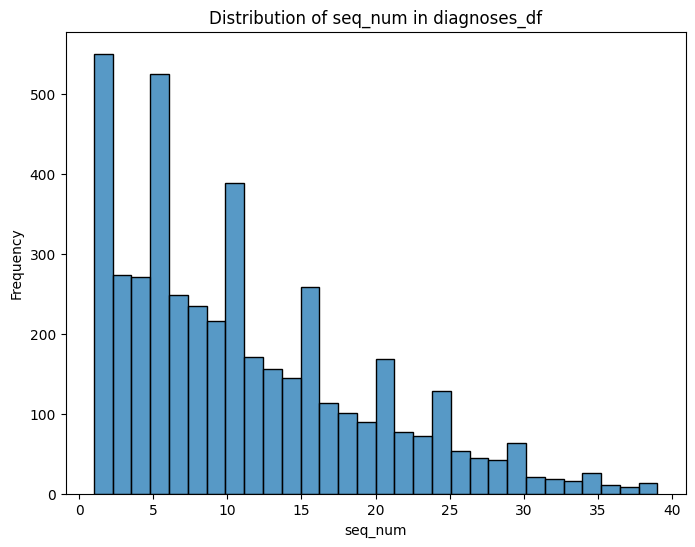


--- Summary statistics for seq_num ---
count    4506.000000
mean       11.163338
std         8.200563
min         1.000000
25%         5.000000
50%         9.000000
75%        16.000000
max        39.000000
Name: seq_num, dtype: float64


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(diagnoses_df['seq_num'], bins=30, kde=False)
plt.title('Distribution of seq_num in diagnoses_df')
plt.xlabel('seq_num')
plt.ylabel('Frequency')
plt.show()

print("\n--- Summary statistics for seq_num ---")
print(diagnoses_df['seq_num'].describe())